In [105]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import warnings
import plotly.express as px
import string

from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from xgboost import XGBClassifier
import warnings
#import tensorflow as tf
#tpu = tf.distribute.cluster_resolver.TPUClusterResolver.connect()
#tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import plotly.offline as offline
import plotly.graph_objs as go

df_test = pd.read_csv("C:/Users/caio.carneiro/Desktop/Estudos/titanic/test.csv")
df_train = pd.read_csv("C:/Users/caio.carneiro/Desktop/Estudos/titanic/train.csv")
df_data = pd.concat([df_train, df_test], sort=True).reset_index(drop=True)
dfs = [df_train, df_test]

In [106]:
df_data.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [ ]:
#Missing Values

In [107]:
cols_with_missing = [col for col in df_data.columns if df_data[col].isnull().any()]
pd.isnull(df_data[cols_with_missing]).sum() #Acredito que aqui está mostrando a quantidade de missings em cada coluna

Age          263
Cabin       1014
Embarked       2
Fare           1
Survived     418
dtype: int64

In [ ]:
#1.1 Age
#Para resolver o problema de valores ausentes para o campo Idade, procederemos da seguinte forma. 
#Como a PClass é a variável mais correlacionada com a Idade e Sobrevivência, agruparemos os passageiros de acordo com a classe 
#a que pertencem. O que faremos é substituir os valores ausentes pela mediana de cada grupo. Aliás, além disso, dentro de cada 
#uma das classes existentes faremos uma distinção de gênero. Fazemos isso porque, como veremos a seguir, a mediana de Idade 
#varia de acordo com o passageiro ser homem ou mulher.


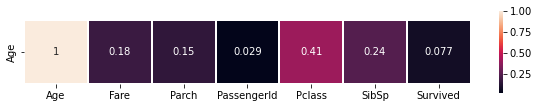

In [108]:
#Cria um mapa de calor
df_heatmap = pd.DataFrame(df_data.corr()['Age'].abs())
f,ax = plt.subplots(figsize = (10,1.5), facecolor = 'white')
sns.color_palette("rocket", as_cmap = True)
sns.heatmap(df_heatmap.transpose(), annot = True, square = True, linewidths = 1.5, cmap = 'rocket')

plt.show() #Tira o código que aparece na parte de cima do gráfico.

#Não entendi muito bem como interpretar esse gráfico


In [109]:
df_data

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,NaN,S,8.0500,"Spector, Mr. Woolf",0,1305,3,male,0,NaN,A.5. 3236
1305,39.0,C105,C,108.9000,"Oliva y Ocana, Dona. Fermina",0,1306,1,female,0,NaN,PC 17758
1306,38.5,NaN,S,7.2500,"Saether, Mr. Simon Sivertsen",0,1307,3,male,0,NaN,SOTON/O.Q. 3101262
1307,NaN,NaN,S,8.0500,"Ware, Mr. Frederick",0,1308,3,male,0,NaN,359309


In [110]:
mediana = df_data.groupby(['Sex', 'Pclass']).median()['Age']
for i in range(0, mediana.shape[0]):
    if i < 3:
        print('Mediana das idades para mulheres da classe {}: {}'.format(i + 1, mediana[i]))
    else:
        print('Mediana das idades para os homens da classe {}: {}'.format(i+1 - 3, mediana[i]))
            
df_data['Age'] = df_data.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x : x.fillna(x.median()))
print('Missing values for Age: {}'.format(df_data.Age.isnull().sum()))
        

Mediana das idades para mulheres da classe 1: 36.0
Mediana das idades para mulheres da classe 2: 28.0
Mediana das idades para mulheres da classe 3: 22.0
Mediana das idades para os homens da classe 1: 42.0
Mediana das idades para os homens da classe 2: 29.5
Mediana das idades para os homens da classe 3: 25.0
Missing values for Age: 0


In [111]:
#1.2 Embarked
#Com relação ao Embarcado, substituiremos os dados ausentes pela moda, ou seja, o valor mais repetido
df_data.Embarked.value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [112]:
moda = 'S'
df_data.Embarked = df_data.Embarked.replace(np.nan, moda)
pd.isnull(df_data).sum()

Age               0
Cabin          1014
Embarked          0
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

In [14]:
#1.3 Cabin
#O recurso de cabine é um pouco complicado e precisa de mais exploração. A grande parte do recurso Cabine está faltando e o 
#recurso em si não pode ser ignorado completamente porque algumas cabines podem ter taxas de sobrevivência mais altas. 
#Acontece que a primeira letra dos valores das cabines são os decks em que as cabines estão localizadas. Esses conveses eram 
#principalmente separados para uma classe de passageiros, mas alguns deles eram usados por várias classes de passageiros.

In [15]:
#No convés do barco havia 6 salas rotuladas como T, U, W, X, Y, Z, mas apenas a cabine T está presente no conjunto de dados
# Os decks A, B e C eram apenas para passageiros de 1ª classe
# Os decks D e E eram para todas as classes
# Os decks F e G eram para passageiros de 2ª e 3ª classe
# De A a G, a distância até a escada aumenta o que pode ser um fator de sobrevivência

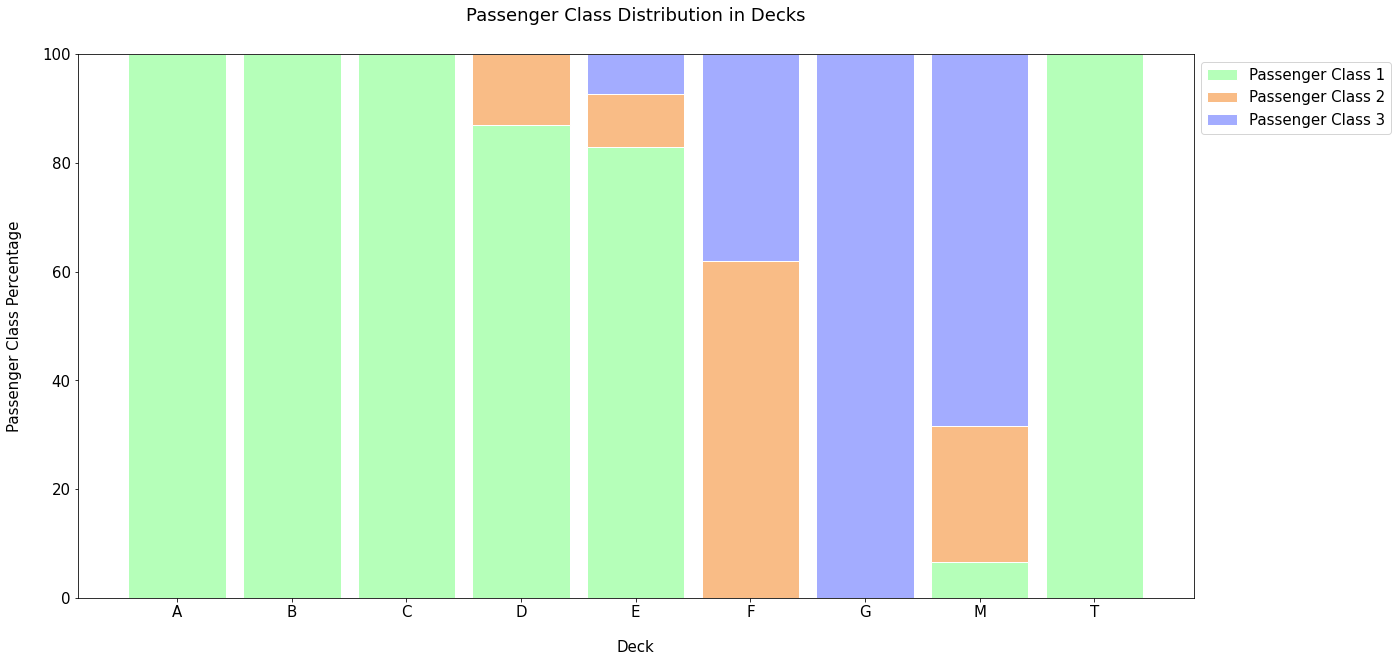

In [113]:
# Criando a coluna Deck a partir da primeira letra da coluna Cabine. (M significa Missing)
df_data['Deck'] = df_data['Cabin'].apply(lambda s: s[0] if pd.notnull (s) else 'M')

df_data_decks = df_data.groupby(['Deck', 'Pclass']).count().drop(columns = ['Survived', 'Sex', 'Age',
'Fare','Embarked','Cabin']).rename(columns = {'Name': 'Count'}).transpose()

def get_pclass_dist(df):
    #Criando um dicionário para cada contagem de classe de passageiros em cada deck
    deck_counts = {'A': {}, 'B': {}, 'C':{}, 'D': {}, 'E': {}, 'F': {}, 'G':{}, 'M':{}, 'T': {}}
    decks = df.columns.levels[0]
    
    for deck in decks:
        for pclass in range(1, 4):
            try:
                count = df[deck][pclass][0]
                deck_counts[deck][pclass] = count
            except KeyError:
                deck_counts[deck][pclass] = 0
                
    df_decks = pd.DataFrame(deck_counts)
    deck_percentages = {}
    
    
    # Criando um dicionário para cada porcentagem de classe de passageiros em cada deck
    for col in df_decks.columns:
        deck_percentages[col] = [(count / df_decks[col].sum()) * 100 for count in df_decks[col]]
        
    return deck_counts, deck_percentages

def display_pclass_dist(percentages):
    df_percentages = pd.DataFrame(percentages).transpose()
    deck_names = ('A', 'B', 'C', 'D', 'E', 'F', 'G', 'M', 'T')
    bar_count = np.arange(len(deck_names))
    bar_width = 0.85
    
    pclass1 = df_percentages[0]
    pclass2 = df_percentages[1]
    pclass3 = df_percentages[2]
    
    plt.figure(figsize = (20, 10))
    plt.bar(bar_count, pclass1, color ='#b5ffb9', edgecolor = 'white', width = bar_width, label = 'Passenger Class 1')
    plt.bar(bar_count, pclass2, bottom = pclass1, color = '#f9bc86', edgecolor = 'white', width = bar_width, label = 'Passenger Class 2')
    plt.bar(bar_count, pclass3, bottom = pclass1 + pclass2, color = '#a3acff', edgecolor = 'white', width = bar_width, label = 'Passenger Class 3')
    

    plt.xlabel('Deck', size = 15, labelpad = 20)
    plt.ylabel('Passenger Class Percentage', size=15, labelpad=20)
    plt.xticks(bar_count, deck_names)
    plt.tick_params(axis ='x', labelsize = 15)
    plt.tick_params(axis = 'y', labelsize=15)
                    
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 15})
    plt.title('Passenger Class Distribution in Decks', size=18, y = 1.05)
    plt.show()
                    
all_deck_count, all_deck_per = get_pclass_dist(df_data_decks)
display_pclass_dist(all_deck_per)

In [70]:
#Interpretação: para este gráfico vamos agrupar por atributo Deck e PClass. Podemos apreciar que A, B e C estão totalmente 
#ocupados por passageiros de 1ª classe. Além disso, como há apenas uma pessoa no convés T, cuja classe 1 vamos agrupá-lo com 
#o convés A. O convés do tipo D é ocupado principalmente por passageiros de 1ª classe, concretamente 85%. Os demais são da 
#2ª classe. Para concluir, os restantes conveses têm todos os passageiros de cada uma das classes.

In [114]:
#Agrupando os passageiros da classe T com a A
idx = df_data[df_data['Deck'] == 'T'].index
df_data.loc[idx, 'Deck'] = 'A'

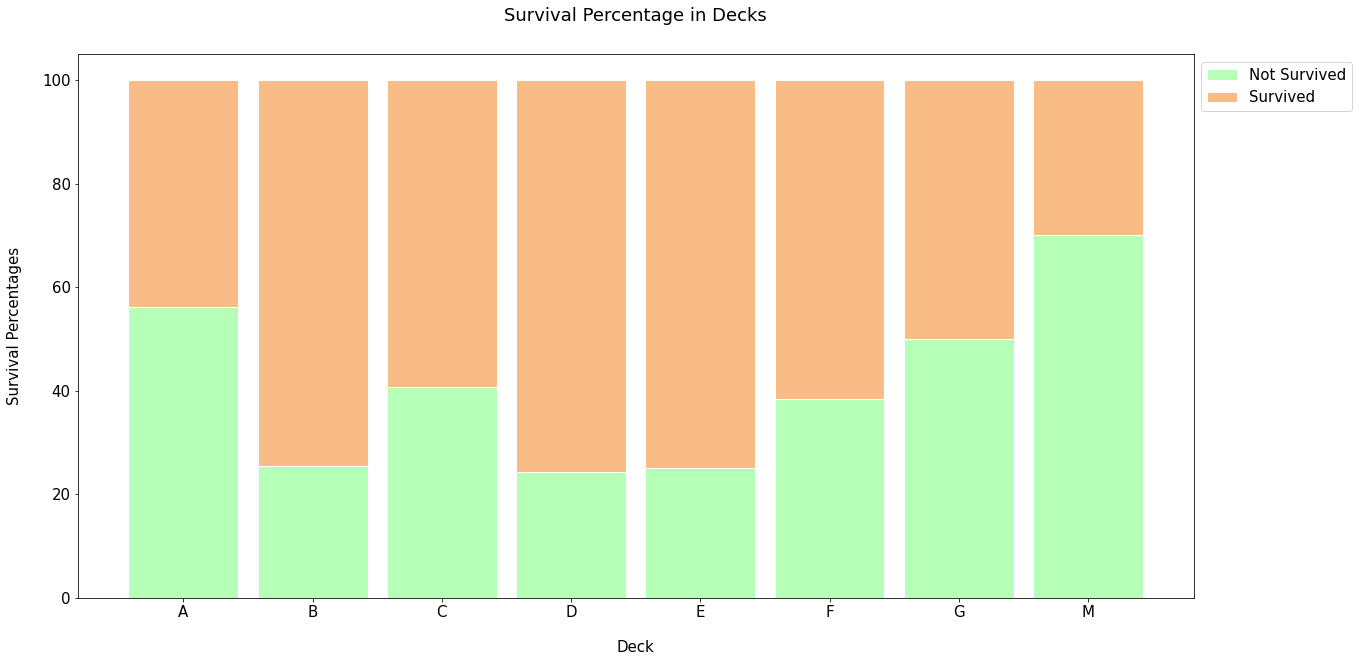

In [115]:
df_all_decks_survived = df_data.groupby(['Deck','Survived']).count().drop(columns = ['Sex', 'Age', 'Fare',
                                        'Embarked','Pclass','Cabin']).rename(columns = {'name': 'Count'}).transpose()

def get_survived_dist(df):
    #Criando um dicionario para cada contagem de sobreviventes por deck
    surv_counts = {'A':{}, 'B':{}, 'C': {}, 'D':{}, 'E':{}, 'F':{}, 'G':{}, 'M':{}}
    decks = df.columns.levels[0]
    
    for deck in decks:
        for survive in range(0,2):
            surv_counts[deck][survive] = df[deck][survive][0]
            
            
    df_surv = pd.DataFrame(surv_counts)
    surv_percentages = {}
    
    for col in df_surv.columns:
        surv_percentages[col] = [(count / df_surv[col].sum()) * 100 for count in df_surv[col]]
        
    return surv_counts, surv_percentages
    
    
def display_surv_dist(percentages):
        
    df_survived_percentages = pd.DataFrame(percentages).transpose()
    deck_names = ('A', 'B', 'C', 'D', 'E', 'F', 'G', 'M')
    bar_count = np.arange(len(deck_names))
    bar_width= 0.85
        
    not_survived = df_survived_percentages[0]
    survived = df_survived_percentages[1]
        
    plt.figure(figsize = (20,10))
    plt.bar(bar_count, not_survived, color = '#b5ffb9', edgecolor ='white', width = bar_width, label = 'Not Survived')
    plt.bar(bar_count, survived, bottom = not_survived, color = '#f9bc86', edgecolor = 'white', width = bar_width, label = "Survived")
    
        
    plt.xlabel('Deck', size = 15, labelpad = 20)
    plt.ylabel('Survival Percentages', size = 15, labelpad = 20)
    plt.xticks(bar_count, deck_names)
    plt.tick_params(axis = 'x',labelsize = 15)
    plt.tick_params(axis = 'y', labelsize = 15)
        
    plt.legend(loc='upper left', bbox_to_anchor = (1,1), prop = {'size': 15})
    plt.title('Survival Percentage in Decks', size = 18, y = 1.05)
        
    plt.show()
        
all_surv_count, all_surv_per = get_survived_dist(df_all_decks_survived)
display_surv_dist(all_surv_per)
        


In [96]:
#Interpretação: para este gráfico vamos agrupar por Deck e atributo Sobrevivente, para ver a taxa de sobrevivência que 
#cada Deck possui. Podemos perceber que as taxas de sobrevivência esperadas são diferentes para cada tipo de Deck. B, D e E 
#são os mais altos. Por outro lado, A e M são os menores

In [97]:
#Devido ao que acabamos de ver antes, vamos rotular os decks da seguinte maneira:

#Os decks A, B e C, como todos têm passageiros de 1ª classe, serão rotulados como ABC
#Os decks D e E são rotulados como DE porque ambos têm distribuição de classe de passageiros semelhante e mesma taxa de 
#sobrevivência seguindo o critério anterior, rotulamos FG
#M continua igual porque é bem diferente dos demais e é o que tem a menor taxa de sobrevivência.

In [116]:
df_data['Deck'] = df_data['Deck'].replace(['A','B','C'],'ABC')
df_data['Deck'] = df_data['Deck'].replace(['D','E'], 'DE')
df_data['Deck'].value_counts()

M      1014
ABC     182
DE       87
F        21
G         5
Name: Deck, dtype: int64

In [117]:
df_data = df_data.drop('Cabin',axis=1)
df_data.isnull().sum()

Age              0
Embarked         0
Fare             1
Name             0
Parch            0
PassengerId      0
Pclass           0
Sex              0
SibSp            0
Survived       418
Ticket           0
Deck             0
dtype: int64

In [118]:
#1.4 Tarifa
# Temos um valor ausente para Tarifa, pertencente a um homem do conjunto de dados de teste. Podemos supor que está relacionado 
# a FamilySize e PClass. O valor da tarifa mediana de um homem com passagem de terceira classe e sem família é uma escolha lógica
# para preencher o valor ausente.